In [1]:
%matplotlib inline 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model, Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math 
from tensorflow.keras import optimizers


#### data load
-  https://www.cs.toronto.edu/~kriz/cifar.html
- 분류 정보 : 10개 category
-- 'airplane'
'automobile'
'bird'
'cat'
'deer'
'dog'
'frog'
'horse'
'ship'
'truck'
- input Train data : 32x32 RGB 24bit 50000, Object 
- input Test data : 32x32 RGB 24bit 10000장, Object
- output Train data : label 50000
- output Test data : label 10000


In [2]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)

(10000, 32, 32, 3)
(50000, 32, 32, 3)
(10000, 1)
(50000, 1)


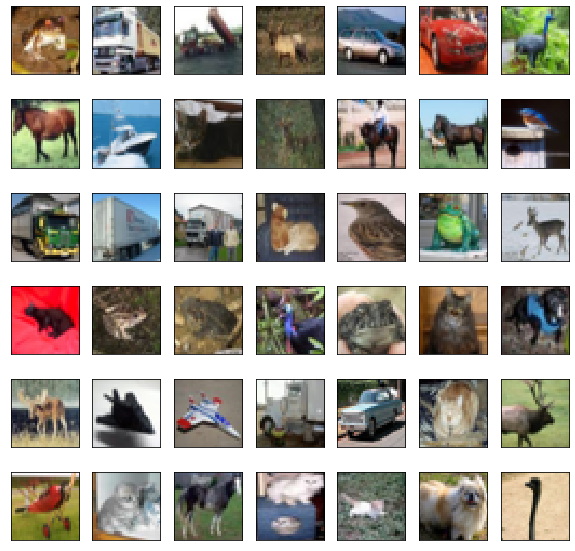

In [3]:
fig= plt.figure(figsize=(10,10))

for i in range(42):
    ax = fig.add_subplot(6,7, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i])

In [4]:
## pixel normalization to float 
X_train = X_train/255.0
X_test = X_test/255.0
X_train[0,0,0]

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print('Y:', Y_test.shape)



Y: (10000, 10)


#### Model 생성

In [5]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=4, padding='same', strides=1, activation='relu', input_shape=(32,32,3,)))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=4, padding='same', strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=4, padding='same', strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))  #출력은 항상 카테고리
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

#### model optimization설정

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr = 0.00001), metrics=['accuracy'])

#### 학습

In [7]:
hist= model.fit(X_train, Y_train, batch_size=150, epochs=20, validation_split=0.2)

Epoch 1/20
267/267 [==============================] - 15s 57ms/step - loss: 2.2735 - accuracy: 0.1792 - val_loss: 2.2360 - val_accuracy: 0.2561
Epoch 2/20
267/267 [==============================] - 15s 58ms/step - loss: 2.1788 - accuracy: 0.2700 - val_loss: 2.1077 - val_accuracy: 0.2806
Epoch 3/20
267/267 [==============================] - 16s 59ms/step - loss: 2.0342 - accuracy: 0.3008 - val_loss: 1.9813 - val_accuracy: 0.3108
Epoch 4/20
267/267 [==============================] - 16s 59ms/step - loss: 1.9433 - accuracy: 0.3191 - val_loss: 1.9158 - val_accuracy: 0.3289
Epoch 5/20
267/267 [==============================] - 16s 60ms/step - loss: 1.8881 - accuracy: 0.3408 - val_loss: 1.8722 - val_accuracy: 0.3446
Epoch 6/20
267/267 [==============================] - 16s 60ms/step - loss: 1.8453 - accuracy: 0.3568 - val_loss: 1.8297 - val_accuracy: 0.3581
Epoch 7/20
267/267 [==============================] - 16s 60ms/step - loss: 1.8043 - accuracy: 0.3714 - val_loss: 1.7895 - val_accuracy:

#### evaluate

In [8]:
## lr=0.00032, epoch4,:  66%
##
score = model.evaluate(X_test, Y_test)
score 

313/313 [==============================] - 2s 5ms/step - loss: 1.5138 - accuracy: 0.4685


[1.513833999633789, 0.4684999883174896]

#### prediction test
- 출력의 label 지정 


In [9]:
pred = model.predict(X_test)
label = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

1  vs  9
7  vs  7
8  vs  8
6  vs  6
4  vs  4
8  vs  8
4  vs  4
2  vs  2
8  vs  8
4  vs  6
6  vs  4
6  vs  7
6  vs  6
4  vs  5
1  vs  4
9  vs  1
1  vs  1
8  vs  8
0  vs  7
1  vs  1
3  vs  3
1  vs  5
4  vs  5
9  vs  9
5  vs  2
8  vs  8
8  vs  8
0  vs  0
5  vs  4
4  vs  4
8  vs  0
5  vs  2


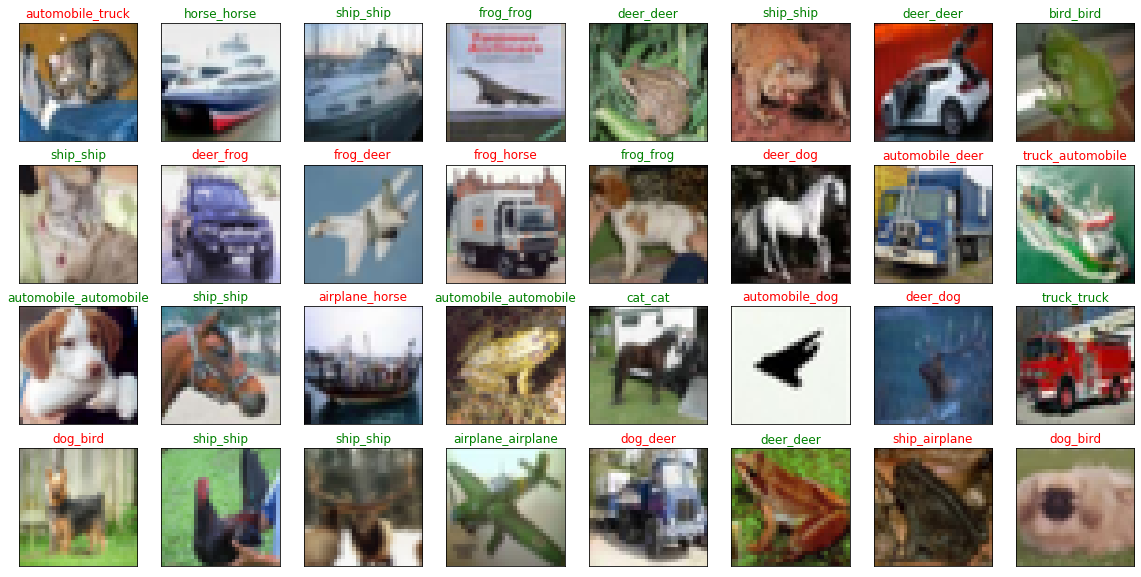

In [10]:
fig = plt.figure(figsize=(20,10))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32)):
    ax = fig.add_subplot(4, 8, i+1, xticks=[], yticks=[]) ##32개
    ax.imshow(X_test[i])
    pred_idx = np.argmax(pred[idx]) #iinverse one hot encode : prediction label 
    true_idx = np.argmax(Y_test[idx])# iinverse one hot encode :
    print(pred_idx, " vs ", true_idx)
    ax.set_title("{}_{}".format(label[pred_idx], label[true_idx]), color='green' if pred_idx == true_idx else 'red')

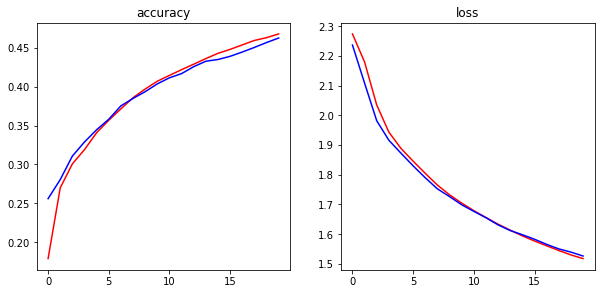

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.plot(hist.history['accuracy'], color='r')
plt.plot(hist.history['val_accuracy'], color='b')
plt.title('accuracy')

#loss 조회
plt.subplot(2, 2, 2)
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_loss'], color='b')
plt.title('loss')
plt.show()